In [58]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [59]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shubh0799/churn-modelling")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/churn-modelling


In [60]:
import pandas as pd
import os

# The path variable from the previous cell contains the directory where the dataset was downloaded.
# We need to find the actual CSV file within that directory.
# Assuming the CSV file is named 'Churn_Modelling.csv' based on the dataset name.
csv_path = os.path.join(path, 'Churn_Modelling.csv')

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_path,index_col=0)

# Display the first few rows of the DataFrame to verify
display(df.head())

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [61]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [64]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [65]:
X = df.iloc[:,:-1]
X.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [66]:
X.drop(columns=['CustomerId','Surname'],axis=1,inplace=True)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
3,502,France,Female,42,8,159660.80,3,1,0,113931.57
4,699,France,Female,39,1,0.00,2,0,0,93826.63
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [67]:
y=df.iloc[:,-1]
y.head()

,Exited
RowNumber,
1,1
2,0
3,1
4,0
5,0


In [68]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
X['IsMale'] = OrdinalEncoder().fit_transform(X[['Gender']])

In [69]:
X.Geography.value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [70]:
encoder = OneHotEncoder(sparse_output=False)
new = pd.DataFrame(encoder.fit_transform(X[['Geography']]))
new.columns = ['Germany','France','Spain']
new.head()

,Germany,France,Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [71]:
X.drop(columns=['Gender','Geography'],axis=1,inplace=True)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,IsMale
RowNumber,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,0.0
2,608,41,1,83807.86,1,0,1,112542.58,0.0
3,502,42,8,159660.80,3,1,0,113931.57,0.0
4,699,39,1,0.00,2,0,0,93826.63,0.0
5,850,43,2,125510.82,1,1,1,79084.10,0.0


In [75]:
new.index = X.index

In [77]:
X_new = pd.concat([X,new],axis=1)

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.2,random_state=0)

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -1.01460667,
        -0.5698444 ,  1.74309049],
       [-2.30455945,  0.30102557, -1.37744033, ..., -1.01460667,
         1.75486502, -0.57369368],
       [-1.19119591, -0.94312892, -1.031415  , ...,  0.98560362,
        -0.5698444 , -0.57369368],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.98560362,
        -0.5698444 , -0.57369368],
       [-0.62420521, -0.08179119,  1.39076231, ..., -1.01460667,
        -0.5698444 ,  1.74309049],
       [-0.28401079,  0.87525072, -1.37744033, ..., -1.01460667,
         1.75486502, -0.57369368]])

In [82]:
X_train.shape

(8000, 12)

In [83]:
X_test.shape

(2000, 12)

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [117]:
model = Sequential()
model.add(Dense(units=12,activation='relu'))

In [118]:
model.add(Dense(units=8,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=6,activation='relu'))
model.add(Dropout(0.3))

In [119]:
model.add(Dense(units=1,activation='sigmoid'))

In [120]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [121]:
import tensorflow
OPT = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=OPT,loss='binary_crossentropy',metrics=['accuracy'])

In [122]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [123]:
model_history = model.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8013 - loss: 0.4977 - val_accuracy: 0.7955 - val_loss: 0.4428
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7938 - loss: 0.4562 - val_accuracy: 0.7955 - val_loss: 0.4345
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7980 - loss: 0.4357 - val_accuracy: 0.7955 - val_loss: 0.4149
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7981 - loss: 0.4246 - val_accuracy: 0.7955 - val_loss: 0.3986
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7961 - loss: 0.4083 - val_accuracy: 0.7955 - val_loss: 0.4006
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7959 - loss: 0.3991 - val_accuracy: 0.7955 - val_loss: 0.3974
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7988 - loss: 0.4053 - val_accuracy: 0.7955 - val_loss: 0.4123
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8041 - loss: 0.3990 - val_accu

In [124]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

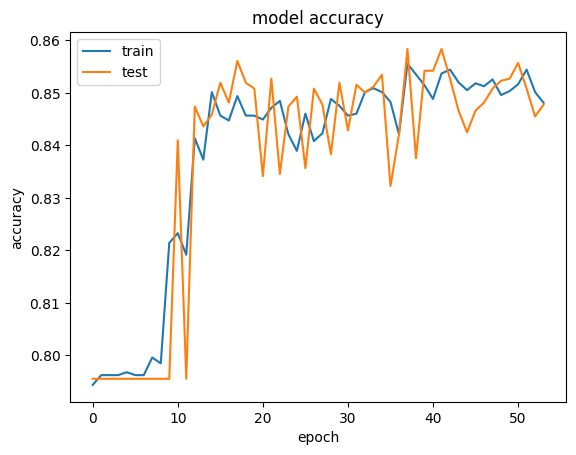

In [125]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

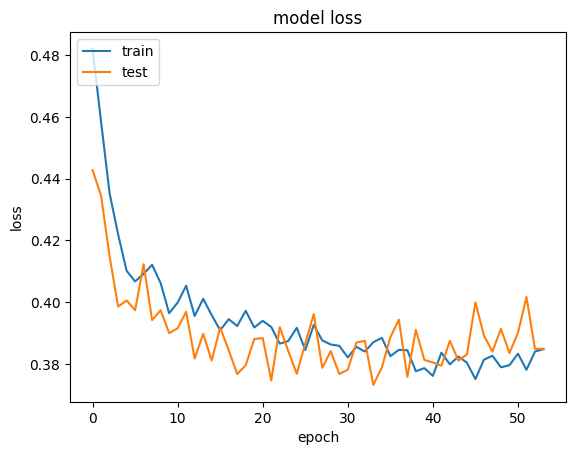

In [126]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [127]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [128]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
cm

array([[1474,  121],
       [ 177,  228]])

In [129]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score

0.851

In [130]:
model.get_weights()

[array([[ 4.09765750e-01, -8.68540466e-01,  2.43713148e-02,
          1.33446836e+00,  1.19136117e-01,  1.70300707e-01,
          5.57662487e-01, -4.97929864e-02,  4.62965108e-02,
         -1.55447215e-01,  1.02989256e+00,  1.16830468e+00],
        [ 2.56683183e+00, -1.51857424e+00,  5.65669715e-01,
         -1.11664021e+00, -2.26857290e-01, -1.01182842e+00,
         -2.52801871e+00,  3.95581007e+00, -3.38785648e-01,
         -3.08559656e+00, -1.95260656e+00,  6.92458972e-02],
        [ 2.34788448e-01,  3.68450284e-01,  9.80655998e-02,
         -3.41968358e-01,  1.13910865e-02,  1.42182219e+00,
          3.96604016e-02,  2.17741683e-01,  4.03713554e-01,
         -5.28445132e-02,  6.52603447e-01, -1.04601383e+00],
        [ 4.77076828e-01,  1.81178242e-01,  7.94754267e-01,
         -1.46247700e-01, -3.54239702e+00, -2.82868445e-01,
          9.71012294e-01, -2.25721762e-01,  4.28818464e+00,
         -1.25395024e+00,  2.32364154e+00,  3.39900404e-01],
        [ 6.20549202e-01,  8.1670069